In [1]:
# Testing 
for i in range(4):
    print(i)



0
1
2
3


In [2]:
## import some packages to use
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

#To see our directory
import os
import random
import gc   #Gabage collector for cleaning deleted data from memory




In [14]:
train_dir = '../data/dogs-vs-cats/train'
test_dir = '../data/dogs-vs-cats/test1'

train_dogs = ['../data/dogs-vs-cats/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i]  #get dog images
train_cats = ['../data/dogs-vs-cats/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]  #get cat images

test_imgs = ['../data/dogs-vs-cats/test1/{}'.format(i) for i in os.listdir(test_dir)] #get test images

train_imgs = train_dogs[:2000] + train_cats[:2000]  # slice the dataset and use 2000 in each class
random.shuffle(train_imgs)  # shuffle it randomly

#Clear list that are useless
del train_dogs
del train_cats
gc.collect()   #collect garbage to save memory

342

In [4]:
import os
 
dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : /Users/alejandro.robles/PycharmProjects/DogsCats456/scripts
Directory name is : scripts


In [5]:

os.listdir(test_dir)

['9733.jpg',
 '63.jpg',
 '6400.jpg',
 '823.jpg',
 '4217.jpg',
 '3578.jpg',
 '10321.jpg',
 '2666.jpg',
 '5109.jpg',
 '11981.jpg',
 '10447.jpg',
 '2100.jpg',
 '11759.jpg',
 '4571.jpg',
 '7078.jpg',
 '12250.jpg',
 '1409.jpg',
 '9055.jpg',
 '6366.jpg',
 '12244.jpg',
 '189.jpg',
 '9041.jpg',
 '6372.jpg',
 '11995.jpg',
 '10453.jpg',
 '2114.jpg',
 '4565.jpg',
 '4203.jpg',
 '10335.jpg',
 '2672.jpg',
 '9727.jpg',
 '6414.jpg',
 '77.jpg',
 '8439.jpg',
 '837.jpg',
 '2882.jpg',
 '3544.jpg',
 '11003.jpg',
 '5135.jpg',
 '1353.jpg',
 '7722.jpg',
 '8411.jpg',
 '7044.jpg',
 '8377.jpg',
 '1435.jpg',
 '9069.jpg',
 '5653.jpg',
 '3222.jpg',
 '11765.jpg',
 '5647.jpg',
 '2128.jpg',
 '3236.jpg',
 '11771.jpg',
 '4559.jpg',
 '7050.jpg',
 '8363.jpg',
 '12278.jpg',
 '1421.jpg',
 '6428.jpg',
 '1347.jpg',
 '7736.jpg',
 '8405.jpg',
 '2896.jpg',
 '3550.jpg',
 '11017.jpg',
 '10309.jpg',
 '5121.jpg',
 '9928.jpg',
 '638.jpg',
 '7905.jpg',
 '9096.jpg',
 '8388.jpg',
 '12293.jpg',
 '5874.jpg',
 '11942.jpg',
 '10484.jpg',
 '

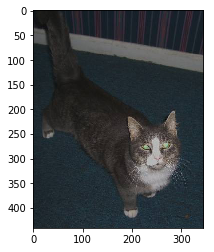

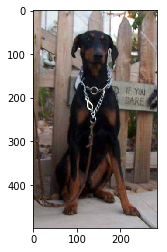

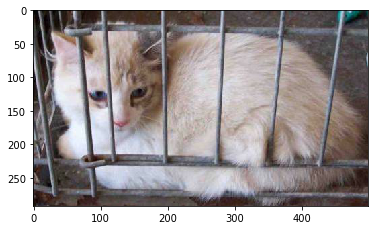

In [6]:

import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [7]:
import cv2

#Lets declare our image dimensions
#we are using coloured images. 
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    
    return X, y

In [8]:
#get the train and label data
X, y = read_and_process_image(train_imgs)

In [9]:
import numpy as np

y2 = np.array(y)

In [10]:
y2.shape

(4000,)

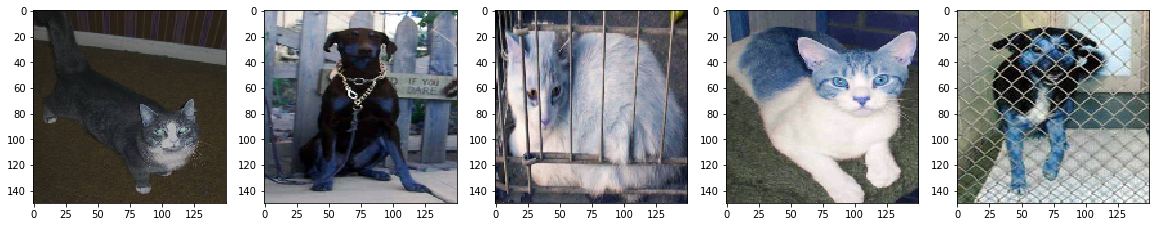

In [11]:

#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

Text(0.5, 1.0, 'Labels for Cats and Dogs')

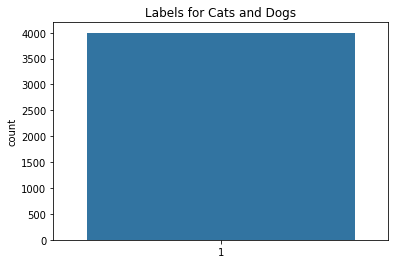

In [13]:
import seaborn as sns
del train_imgs
gc.collect()

#Convert list to numpy array
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for Cats and Dogs')